In [3]:
#import the libraries 

import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, plot_importance
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

In [9]:
#load data and read the file 
anime = pd.read_csv("/content/anime_log.csv")
data=anime.copy()
# print(data.shape)
# df3.drop(['description_no_puntuation', 'description_Clean'], axis=1, inplace=True)

#. Check description
# data.describe().T

data.shape
data.head()


,mediaType,eps,ongoing,sznOfRelease,description,contentWarn,rating,tag_'Comedy',tag_'Based on a Manga',tag_'Action',...,studio_to_work,description_no_puntuation,description_Clean,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log
0,TV,64.00,False,Spring,The foundation of alchemy is based on the law ...,1,4.70,0,1,1,...,Others,the foundation of alchemy is based on the law ...,foundation alchemy based law equivalent exchan...,1.79,11.55,9.57,10.16,7.88,11.37,0.69
1,Movie,1.00,False,Unknown,Mitsuha and Taki are two total strangers livin...,0,4.66,0,0,0,...,Others,mitsuha and taki are two total strangers livin...,mitsuha taki two total strangers living comple...,4.68,10.98,7.28,9.99,4.83,10.69,0.00
2,Movie,1.00,False,Unknown,"After transferring into a new school, a deaf g...",1,4.66,0,1,0,...,Others,after transferring into a new school a deaf gi...,transferring new school deaf girl shouko nishi...,4.88,10.73,6.85,9.75,4.89,10.43,0.00
3,TV,10.00,False,Fall,"Picking up where the second season ended, the ...",0,4.66,0,1,0,...,Production I.G,picking up where the second season ended the b...,picking second season ended boys prepare final...,2.56,10.13,7.69,9.00,5.12,9.77,0.00
4,TV,10.00,False,Spring,The battle to retake Wall Maria begins now! Wi...,1,4.65,0,1,1,...,Others,the battle to retake wall maria begins now wit...,battle retake wall maria begins eren’s new har...,1.79,9.97,8.08,8.97,5.16,9.67,0.00


##TF-IDF with n-grams

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
not_stop_words = ["not", "no"]
stop_words_new = [x for x in stop_words if x not in not_stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
vectorizer = TfidfVectorizer(
    lowercase = True, 
    stop_words = stop_words_new, 
    ngram_range = (1, 2), 
    min_df = 0.03, 
    max_df = 0.2
)

X = vectorizer.fit_transform(data["description_Clean"])

len(vectorizer.get_feature_names_out())

165

In [12]:
vectorizer.get_feature_names_out()

array(['able', 'academy', 'ago', 'along', 'also', 'always', 'another',
       'around', 'away', 'back', 'battle', 'beautiful', 'become',
       'becomes', 'begins', 'behind', 'best', 'boy', 'called', 'city',
       'club', 'come', 'comes', 'day', 'death', 'decides', 'defeat',
       'discover', 'discovers', 'earth', 'end', 'even', 'ever', 'every',
       'everything', 'evil', 'face', 'family', 'father', 'fight',
       'fighting', 'finally', 'find', 'finds', 'first', 'friend',
       'friends', 'future', 'game', 'gang', 'get', 'girl', 'girls', 'go',
       'good', 'group', 'help', 'high', 'high school', 'home', 'however',
       'human', 'humans', 'japan', 'keep', 'known', 'land', 'learn',
       'left', 'life', 'like', 'little', 'live', 'lives', 'living',
       'long', 'lost', 'love', 'magic', 'magical', 'make', 'man', 'many',
       'may', 'meets', 'members', 'middle', 'mother', 'much', 'must',
       'mysterious', 'name', 'named', 'never', 'new', 'night', 'no',
       'normal', 'no

In [13]:
#Let's remove words that appear in many documents (common words): we dont need to remove words again but just in case
vectorizer = TfidfVectorizer(
    lowercase = True, 
    stop_words = stop_words_new, 
    ngram_range = (1, 2), 
    min_df = 0.03, 
    max_df = 0.2
)

X = vectorizer.fit_transform(data["description_Clean"])

In [14]:
len(vectorizer.get_feature_names_out())

165

In [15]:
X.toarray()

array([[0.        , 0.        , 0.30720526, ..., 0.23644127, 0.        ,
        0.20801794],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
data_tfidf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [17]:
data_tfidf.isna().sum()

able       0
academy    0
ago        0
along      0
also       0
          ..
would      0
year       0
years      0
yet        0
young      0
Length: 165, dtype: int64

In [18]:
data_tfidf.shape

(7633, 165)

In [22]:
data.reset_index(drop = True, inplace = True)
data_tfidf.reset_index(drop = True, inplace = True)
column_list = list(df3)
data_tfidf[column_list] = df3[column_list]
data_tfidf.shape

(7633, 213)

In [23]:
df3.shape, data_tfidf.shape

((7633, 48), (7633, 213))

In [24]:
data_tfidf.drop(columns=["description", "description_no_puntuation", "description_Clean"], axis=1,inplace=True)

In [25]:
X = data_tfidf.drop(["rating"], axis=1)

y = data_tfidf["rating"]

In [29]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,able,academy,ago,along,also,always,another,around,away,back,...,sznOfRelease_Winter,studio_to_work_MADHOUSE,studio_to_work_OLM,studio_to_work_Others,studio_to_work_Production I.G,studio_to_work_Studio Deen,studio_to_work_Studio Pierrot,studio_to_work_Sunrise,studio_to_work_TMS Entertainment,studio_to_work_Toei Animation
0,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0,0,0,1,0,0,0,0,0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,...,0,0,0,1,0,0,0,0,0,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,...,0,0,0,1,0,0,0,0,0,0


In [37]:
# sentimental analysis 
# train, test = train_test_split(data_tfidf, test_size = 0.2, random_state = 1)
# print(train.shape)
# print(test.shape)
# print(data_tfidf.shape)

In [32]:
#regression

In [36]:
# features = vectorizer.get_feature_names_out()
# target = "rating"
# features

In [35]:
# model_logistic = LogisticRegression(
#     solver = "newton-cg",
#     max_iter = 100,
#     verbose = 2,
#     n_jobs = -1,
#     random_state = 1
# ).fit(train[features], train[target])

#Split data into train and test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5343
Number of rows in test data = 2290


In [40]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [41]:
#check the coefficients and intercept of the model, which are the parameters we learned

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
able,0.07
academy,0.04
ago,-0.36
along,-0.04
also,0.01
...,...
studio_to_work_Studio Pierrot,-0.05
studio_to_work_Sunrise,0.22
studio_to_work_TMS Entertainment,0.25
studio_to_work_Toei Animation,0.05


In [42]:
# function to compute adjusted R-squared from Marcelo
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [43]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
print(lin_reg_model_train_perf)

# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
print(lin_reg_model_test_perf)

Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.42 0.33       0.71            0.70 11.93
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.68            0.65 12.11


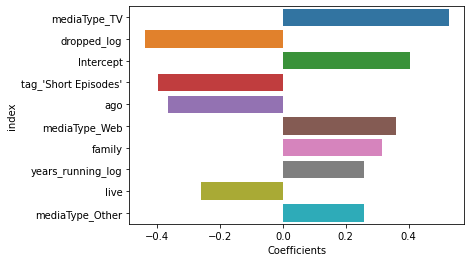

In [44]:
coef_copy=coef_df.copy()
coef_copy["Coefficients_abs"]=np.abs(coef_copy["Coefficients"])
coef_copy=coef_copy.sort_values("Coefficients_abs", ascending=False)
coef_copy.reset_index(inplace=True)
sns.barplot(data=coef_copy.head(10), x="Coefficients", y="index")

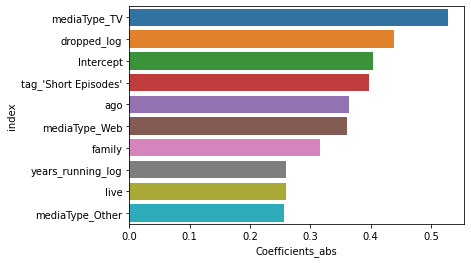

In [45]:
sns.barplot(data=coef_copy.head(10), x="Coefficients_abs", y="index")

#Lasso

In [46]:
model_lasso = Lasso(alpha=0.001).fit(x_train, y_train)

In [47]:
dict_lasso={ 
    "features":list(x_train),
    "coefficients":model_lasso.coef_,
    "coefficients_abs":np.abs(model_lasso.coef_)
}

coef_lasso = pd.DataFrame(dict_lasso)
coef_lasso

,features,coefficients,coefficients_abs
0,able,0.00,0.00
1,academy,-0.00,0.00
2,ago,-0.00,0.00
3,along,-0.00,0.00
4,also,0.00,0.00
...,...,...,...
221,studio_to_work_Studio Deen,-0.00,0.00
222,studio_to_work_Studio Pierrot,-0.03,0.03
223,studio_to_work_Sunrise,0.13,0.13
224,studio_to_work_TMS Entertainment,0.15,0.15


In [48]:
coef_lasso.sort_values("coefficients_abs", ascending=False).head(16)

,features,coefficients,coefficients_abs
203,dropped_log,-0.44,0.44
210,mediaType_TV,0.39,0.39
178,tag_'Short Episodes',-0.37,0.37
201,watching_log,0.25,0.25
205,years_running_log,0.24,0.24
190,tag_'Ecchi',-0.23,0.23
202,wantWatch_log,0.23,0.23
37,family,0.22,0.22
180,tag_'Shorts',-0.21,0.21
208,mediaType_OVA,-0.20,0.20


In [49]:
# (coef_lasso["coefficients_abs"]==0).sum()
coef_lasso[(coef_lasso["coefficients_abs"]==0)]

,features,coefficients,coefficients_abs
0,able,0.00,0.00
1,academy,-0.00,0.00
2,ago,-0.00,0.00
3,along,-0.00,0.00
4,also,0.00,0.00
...,...,...,...
216,sznOfRelease_Winter,-0.00,0.00
219,studio_to_work_Others,0.00,0.00
220,studio_to_work_Production I.G,0.00,0.00
221,studio_to_work_Studio Deen,-0.00,0.00


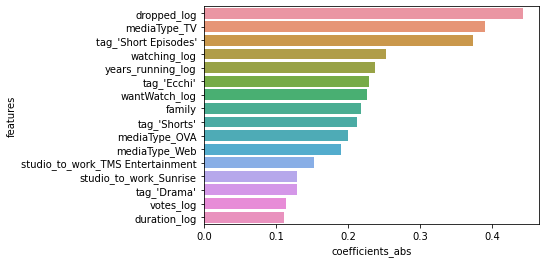

In [50]:
sns.barplot(data=coef_lasso.sort_values("coefficients_abs", ascending=False).head(16), x="coefficients_abs", y="features")

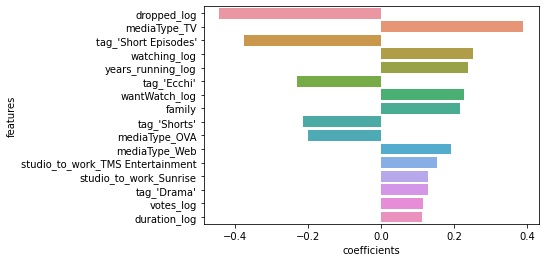

In [56]:
sns.barplot(data=coef_lasso.sort_values("coefficients_abs", ascending=False).head(16), x="coefficients", y="features")

In [51]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model_lasso, x_train, y_train)
print(lin_reg_model_train_perf)





# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(model_lasso, x_test, y_test)
print(lin_reg_model_test_perf)

Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.70            0.69 12.24
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.69            0.65 12.10


XGBRegressor & plot_importance

In [52]:
model_xgbregressor = XGBRegressor(
    max_depth=4, 
    learning_rate=0.1,
    n_estimators=100,
    random_seed=6, 
    reg_alpha=10
).fit(x_train, y_train)

# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model_xgbregressor, x_train, y_train)
print(lin_reg_model_train_perf)

# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(model_xgbregressor, x_test, y_test)
print(lin_reg_model_test_perf)

[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.37 0.29       0.77            0.76 10.61
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.42 0.33       0.70            0.66 12.02


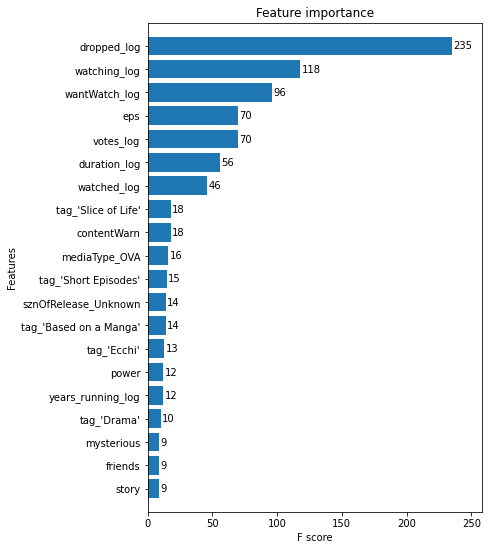

In [53]:
fig,ax=plt.subplots(1,1,figsize=(6,9))
plot_importance(model_xgbregressor,ax=ax, height=0.8, max_num_features=20)
plt.grid(False)